# Bean Sprout Water Prediction


ตัวอย่างนี้จะเป็นการทำนายปริมาณน้ำที่ใช้รดในการปลูกถั่วงอกจากค่าความชื้นในสำลี โดยในการเทรนโมเดลสำหรับการทำนาย จะมีการทำการทดลองเพื่อกำหนดช่วงของปริมาณน้ำที่สามารถวัดได้
<br><br>

**การเก็บข้อมูลการทดลอง**

ทำการนำสำลีใส่แก้ว และวัดค่าความชื้น (moisture) โดยใช้อุปกรณ์ micro:bit
และจดบันทึกเป็นค่าเริ่มต้น หลังจากนั้นค่อยๆเติมน้ำและวัดค่ารอบละ 1 หยด เพื่อนำมาใช้ในการเทรนโมเดล โดยทำการวัดซ้ำ 3 ครั้งก่อนเพิ่มปริมาณน้ำ เพื่อเก็บเป็นข้อมูลสำหรับการทำนาย

<br><br>

**การเรียนรู้โค้ด**

ในตัวอย่างนี้ได้ทำการรวบรวมผลการทดลองจำนวนทั้งสิ้น 100 ค่าเพื่อใช้ในการทำนายปริมาณน้ำ โดยใช้อุปกรณ์ micro:bit ส่งสัญญาณค่าค่าความชื้น (moisture) ที่ได้รับมาจาก IoT Kit ไปยังคอมพิวเตอร์ผ่านสาย USB เพื่อใช้ในการทำนายปริมาณน้ำ (water amount) โดยใช้ Linear Regression Model ในการประมวลผลผ่าน Google Colab
<br><br>

**สิ่งที่ต้องเตรียม**
1. อุปกรณ์ micro:bit* 1 ชิ้น ใช้ได้ทั้ง version 1 และ 2
2. ชุดอุปกรณ์ IoT Kit 1 ชุด ประกอบด้วย OLED Screen, Soil Moisture sensor, และ IoT:bit
3. สาย micro USB 1 เส้น เพื่อเชื่อมต่ออุปกรณ์เข้ากับคอมพิวเตอร์
4. คอมพิวเตอร์โน๊ตบุ๊ค 1 เครื่อง ที่ลงโปรแกรม Google Chrome และสามารถใช้อินเตอร์เน็ตได้

****หมายเหตุ*** การเขียนโปรแกรม hex ที่ใช้สำหรับอุปกรณ์ micro:bit แต่ละรุ่นมีความแตกต่างกัน ขอให้ตรวจสอบรุ่นของอุปกรณ์ให้ตรงกับคู่มือ (ในขั้นตอนที่ 1)
<br><br>
ซึ่งขั้นตอนการนำข้อมูลมาผ่านโปรแกรมทำนายปริมาณน้ำ ได้สรุปเอาไว้ 7 ขั้นตอนหลัก ดังนี้

 **ขั้นตอนที่ 1** การเตรียมอุปกรณ์ micro:bit เพื่อใช้วัดค่าและส่งสัญญาณโต้ตอบผ่านสาย USB

 **ขั้นตอนที่ 2** การเก็บข้อมูลตารางแบบ CSV ด้วยอุปกรณ์ micro:bit สำหรับใช้ในการทดลอง

 **ขั้นตอนที่ 3** การเตรียมชุดข้อมูล CSV (จำนวน 100 ตัวอย่าง) จาก GitHub เพื่อใช้ในเทรนโมเดล

 **ขั้นตอนที่ 4** การเทรนโมเดลเพื่อใช้ในการทำนายปริมาณน้ำ

 **ขั้นตอนที่ 5** การแสดงผลลัพธ์ที่ได้จากการเทรนโมเดลในรูปแบบกราฟ

 **ขั้นตอนที่ 6** การเชื่อมต่อ micro:bit ผ่านสาย USB เพื่อสั่งการและบันทึกผลค่าต่างๆสำหรับทำนายปริมาณน้ำแบบเรียลไทม์

 **ขั้นตอนที่ 7** การทำนายปริมาณน้ำด้วยผลค่าต่างๆที่ได้รับผ่านโมเดลที่เตรียมไว้





### **ขั้นตอนที่ 1** การเตรียมอุปกรณ์ micro:bit เพื่อใช้วัดค่าและส่งสัญญาณโต้ตอบผ่านสาย USB

ในขั้นตอนนี้ จะแบ่งออกเป็น 2 ขั้นตอน ได้แก่ 1.1 การเตรียมอุปกรณ์ และ 1.2 การเตรียมโปรแกรม micro:bit
<br><br>

**ขั้นตอนที่ 1.1** การเตรียมอุปกรณ์

เริ่มต้นโดยประกอบอุปกรณ์เข้าด้วยกัน ดังขั้นตอนต่อไปนี้

a.   ใส่แบตเตอรี่ขนาด CR1220 จำนวน 1 ก้อนลงในอุปกรณ์ IoT:bit

b.   เสียบ micro:bit เข้ากับ IoT:bit โดยหันด้านหน้าขึ้นด้านบน

c.   เสียบ OLED Screen เข้ากับ IoT:bit

d.   ต่อสาย pair เข้ากับอุปกรณ์ Soil Moisture Sensor โดยเสียบอีกด้านเข้ากับ pin1

e.   ต่อสาย USB เข้ากับ micro:bit

โดยดูตัวอย่างจากรูปประกอบ

![iotbit_workflow.png](https://raw.github.com/hengkp/microbit_ml_examples/main/bean%20sprout%20water%20prediction/iotbit_workflow.png)
<br><br>

**ขั้นตอนที่ 1.2** การเตรียมโปรแกรม micro:bit

ในส่วนนี้จะขึ้นอยู่กับรุ่นของ micro:bit ที่ใช้งาน (สามารถตรวจสอบรุ่นได้ที่ตัว micro:bit ซึ่งจะสลักอักษร v1 หรือ v2 ไว้ใกล้กับชื่อแบรนด์) โดยขั้นตอนนี้จะเป็นการเขียนโปรแกรม Python เพื่อให้ตัว micro:bit สื่อสารกับคอมพิวเตอร์ผ่านสาย USB ในการรับคำสั่งเป็นตัวอักษร "#" จากคอมพิวเตอร์ จากนั้นเก็บค่าค่าความเข้มแสง (light intensity) และส่งกลับมายังคอมพิวเตอร์
<br><br>

โดยมีขั้นตอนการเตรียมโปรแกรมดังต่อไปนี้
<br><br>

a. ดาวน์โหลดไฟล์ hex แบบสำเร็จที่เขียนชุดคำสั่งสำหรับเก็บข้อมูล จาก GitHub ลงในคอมพิวเตอร์

สำหรับ **micro:bit version 1 และ 2** [microbit2 - microgreens growth collection.hex](https://raw.github.com/hengkp/microbit_ml_examples/main/bean%20sprout%20water%20prediction/microbit2%20-%20bean%20sprout%20water%20collection.hex)
<br><br>

b. ดาวน์โหลดไฟล์ hex แบบสำเร็จที่เขียนชุดคำสั่งสำหรับเชื่อมต่อ micro:bit กับ Google Colab Notebook จาก GitHub ลงในคอมพิวเตอร์

สำหรับ **micro:bit version 1** [microbit1 - microgreens growth prediction.hex](https://raw.github.com/hengkp/microbit_ml_examples/main/bean%20sprout%20water%20prediction/microbit1%20-%20bean%20sprout%20water%20prediction.hex)


สำหรับ **micro:bit version 2** [microbit2 - microgreens growth prediction.hex](https://raw.github.com/hengkp/microbit_ml_examples/main/bean%20sprout%20water%20prediction/microbit2%20-%20bean%20sprout%20water%20prediction.hex)
<br><br>

c. เข้าไปศีกษาชุดคำสั่งภาษา Python ใน micro:bit ที่บันทึกไว้ในไฟล์ hex ได้ดังนี้

สำหรับ **micro:bit version 1** ให้เข้าไปที่เว็บ [aithaigen](https://microbit.aithaigen.in.th) เพื่อเปิดดูชุดคำสั่ง โดยทางทีมได้ติดตั้งส่วนขยายสำหรับใช้งานชุดคำสั่ง IoT Kit ไว้เรียบร้อยแล้ว สามารถเข้าไปศึกษาฟังก์ชั่นการใช้งานเพิ่มเติมได้ที่ [pdf](https://raw.github.com/hengkp/microbit_ml_examples/main/AIThaiGen_IoTKit_Documentation_v0.2.pdf)

สำหรับ **micro:bit version 2** ให้เข้าไปที่เว็บ [Microsoft MakeCode](https://makecode.microbit.org) เพื่อเปิดดูชุดคำสั่ง โดยต้องโหลดส่วนขยายก่อน สามารถทำได้โดยกดที่รูปเฟือง (มุมขวาบน) แล้วเลือก Extensions จากนั้นค้นหาคำว่า "iot-environment-kit" และกดเลือก จะสามารถใช้งานชุดคำสั่ง IoT Kit ได้

<br><br>
d. หลังจากเรียนรู้ชุดคำสั่งแล้ว สามารถนำไฟล์ hex ที่ดาวน์โหลดในขั้นตอน a. ไปวางใส่ใน folder ของชื่ออุปกรณ์ (ชื่อว่า **"H:\\MICROBIT"**) ที่เชื่อมต่ออยู่กับคอมพิวเตอร์ได้เลย

### **ขั้นตอนที่ 2** การเก็บข้อมูลตารางแบบ CSV ด้วยอุปกรณ์ micro:bit สำหรับใช้ในการทดลอง

ในขั้นตอนนี้ จะเป็นการใช้อุปกรณ์ micro:bit ที่เตรียมไว้ นำมาใช้เก็บข้อมูลการทดลอง โดยมีชั้นตอนดังต่อไปนี้

2.1 เสียบสาย USB จากอุปกรณ์ micro:bit ที่เตรียมไว้เข้ากับเครื่องคอมพิวเตอร์

2.2 ดาวน์โหลดไฟล์ hex ที่ใช้สำหรับเก็บข้อมูลในขั้นตอนก่อนหน้า ไว้ในเครื่องคอมพิวเตอร์

2.3 เปิดโปรแกรม Google Chrome และเข้าไปที่เว็บ [Microsoft MakeCode](https://makecode.microbit.org)

2.4 กดปุ่ม import ที่มุมขวาบนในหน้าเว็บและเลือกไฟล์ที่ต้องการ

2.5 คลิกปุ่มจุดสามจุด (อยู่ข้างปุ่ม Download) และเลือก "Connect Device" เพื่อเชื่อมต่อ micro:bit

2.6 คลิกปุ่ม Download เพื่อโหลดชุดโค้ดลง micro:bit

2.7 คลิกปุ่ม "Show Data Device" ที่ด้านซ้ายมือของหน้าเว็บ เพื่อไปยังหน้าเว็บสำหรับที่เก็บข้อมูล

2.8 จัดเตรียมชุดการทดลอง โดยนำสำลีใส่ในแก้วและจิ้ม Soil Moisture Sensor ลงไป

2.9 ทำการวัดค่าเริ่มต้น (ก่อนเติมน้ำ) โดยกดปุ่ม A และ B พร้อมกันบนอุปกรณ์ micro:bit ที่เตรียมไว้เพื่อบันทึกข้อมูล (ถ้าข้อมูลถูกบันทึกจะขึ้นค่าในหน้าเว็บ) กดซ้ำ 3 ครั้งเพื่อบันทึกค่า

2.10 หยดน้ำลงในแก้วจำนวน 1 หยด และปรับค่า water_amount ใน micro:bit ให้มีค่าเท่ากับ 1 โดยกดปุ่ม A (เพื่อลดปริมาณ) หรีอ B (เพื่อเพิ่มปริมาณ) จากนั้นให้กดปุ่ม A และ B พร้อมกันเพื่อบันทึกค่า โดยกดบันทึกซ้ำ 3 ครั้ง

2.11 ทำซ้ำขั้นตอน 2.10 เพื่อบันทึกค่า โดยปริมาณน้ำที่หยดลงไปจะเพิ่มขึ้นเรื่อยๆ จนกระทั่งครบ 10 หยด

2.12 กดปุ่ม "Export Data" สีน้ำเงินที่มุมขวาบนเพื่อบันทึกข้อมูลที่ได้ลงคอมพิวเตอร์ และเปลี่ยนชื่อไฟล์เป็น **"bean_sprout_water_data.csv"** เพื่อนำไปใช้ในขั้นตอนต่อไป

In [ ]:
#@title **ขั้นตอนที่ 3** การเตรียมชุดข้อมูล CSV (จำนวน 100 ตัวอย่าง) จาก GitHub เพื่อใช้ในเทรนโมเดล
#@markdown สามารถกดรันเพื่อดาวน์โหลดไฟล์ประกอบด้วย **bean_sprout_water_data.csv** และ **bean_sprout_water_model.pkl**

%%shell
git clone https://github.com/hengkp/microbit_ml_examples.git

function getfile {
    cp -R "microbit_ml_examples/bean sprout water prediction/$1" "$1"
}

getfile bean_sprout_water_data.csv
getfile bean_sprout_water_model.pkl
rm -rf microbit_ml_examples

Cloning into 'microbit_ml_examples'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 79 (delta 33), reused 39 (delta 11), pack-reused 0
Unpacking objects: 100% (79/79), 18.59 MiB | 9.34 MiB/s, done.


In [ ]:
#@title **ขั้นตอนที่ 4** การเทรนโมเดลเพื่อใช้ในการทำนายปริมาณน้ำ
#@markdown ในขั้นตอนนี้จะเป็นการเรียนรู้การสร้างโมเดลและเทรนโมเดลสำหรับทำนายปริมาณน้ำจากชุดข้อมูลที่เตรียมไว้ <br>
#@markdown ซึ่งประกอบด้วย ค่าความความชื้น (moisture) และปริมาณน้ำ (water_amount)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib

# นำเข้าชุดข้อมูล
data = pd.read_csv("bean_sprout_water_data.csv")
data = data.rename({'data.moisture': 'moisture', 'data.water_amount': 'water_amount'}, axis=1)

# แบ่งข้อมูลออกเป็นค่าที่ใช้งาน (features) และค่าที่ต้องการทำนาย (target)
X = data[['moisture']]
y = data['water_amount']

# แบ่งข้อมูลสำหรับ training และ testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# เขียนโครงสร้างของโมเดล
model = LinearRegression()

# เทรนโมเดล
model.fit(X_train, y_train)

# ทดสอบโมเดล
y_pred = model.predict(X_test)

# # วิเคราะห์ค่าความแม่นยำ (R-square)
r2 = r2_score(y_test, y_pred)

# แสดงผลความแม่นยำ
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-square:', "{:.2f}".format(r2))

# บันทึกโมเดล
joblib.dump(model, 'bean_sprout_water_model.pkl')

Coefficients: [0.06522736]
Intercept: 0.1317888001912375
Root Mean Squared Error: 0.91


['bean_sprout_water_model.pkl']

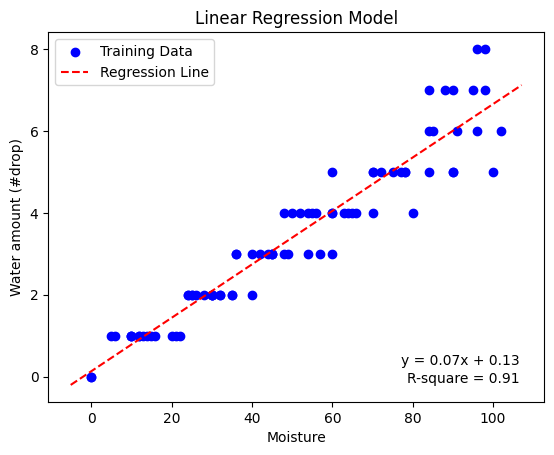

In [ ]:
#@title **ขั้นตอนที่ 5** การแสดงผลลัพธ์ที่ได้จากการเทรนโมเดลในรูปแบบกราฟ
#@markdown ในขั้นตอนนี้จะเป็นการเรียนรู้โมเดลเชิงเส้นจากผลการสร้างโมเดลและเทรนโมเดลสำหรับทำนายปริมาณน้ำจากชุดข้อมูลที่เตรียมไว้ <br>
#@markdown ซึ่งประกอบด้วย ค่าความความชื้น (moisture) และปริมาณน้ำ (water_amount)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# นำเข้าชุดข้อมูล
data = pd.read_csv("bean_sprout_water_data.csv")
data = data.rename({'data.moisture': 'moisture', 'data.water_amount': 'water_amount'}, axis=1)

# แบ่งข้อมูลออกเป็นค่าที่ใช้งาน (features) และค่าที่ต้องการทำนาย (target)
X = data[['moisture']]
y = data['water_amount']

# แบ่งข้อมูลสำหรับ training และ testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# เขียนโครงสร้างของโมเดล
model = LinearRegression()

# เทรนโมเดล
model.fit(X_train, y_train)

# ทดสอบโมเดล
y_pred = model.predict(X_test)

# วิเคราะห์ค่าความแม่นยำ (root mean squared error)
r2 = r2_score(y_test, y_pred)

# แสดงผลกราฟของชุดข้อมูล
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# แสดงสมการและค่า R-square ลงบนกราฟ
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
r2_annotation = f'R-square = {r2:.2f}'
plt.text(0.95, 0.1, equation, transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.05, r2_annotation, transform=plt.gca().transAxes, ha='right')

# แสดงผลเส้นกราฟของโมเดล
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_line = np.linspace(x_min, x_max, 2)
y_line = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_line, linestyle='dashed', color='red', label='Regression Line')

# กำหนดชื่อแกนในกราฟ
plt.xlabel('Moisture')
plt.ylabel('Water amount (#drop)')
plt.title('Linear Regression Model')

# แสดงผลชื่อชุดข้อมูลในกราฟ
plt.legend()

# แสดงรูปกราฟ
plt.show()

In [ ]:
#@title **ขั้นตอนที่ 6** การเชื่อมต่อ micro:bit ผ่านสาย USB เพื่อสั่งการและบันทึกผลค่าต่างๆสำหรับทำนายปริมาณน้ำแบบเรียลไทม์
#@markdown สามารถกดรันเพื่อเชื่อมต่อและสั่งการได้เลย <br>
#@markdown โดยกดปุ่ม **Connect Microbit** จากนั้นเลือกเชื่อมต่อกับอุปกรณ์ และกดปุ่ม **Recieve data** เพื่อเก็บข้อมูลแบบเรียลไทม์ (ถ้าส่งสัญญาณสำเร็จจะเห็นเครื่องหมายถูกปรากฏบนหน้าจอของ micro:bit)<br>
#@markdown \*** ข้อมูลที่ได้จะถูกเก็บในตัวแปรชื่อ **"result"**

# Get the data from microbit <Global variable : 'result'>

from IPython.display import display, Javascript
from google.colab import output
import json

def receiveData(data):
    # Split the string into individual lines
    lines = data.split("\r\n")

    # Initialize an empty dictionary
    globals()['result']  = {}

    # Iterate through each line and split it by the colon separator
    # Then add the key-value pair to the dictionary
    for line in lines:
        if line:
            key, value = line.split(":")
            globals()['result'][key] = int(value.strip())

# register the function to be callable from Python
output.register_callback('notebook.receiveData', receiveData)

display(Javascript('''
  if ('serial' in navigator) {
    const scriptElement = document.createElement("script");
    scriptElement.src = "https://cdnjs.cloudflare.com/ajax/libs/xterm/3.14.5/xterm.min.js";
    document.body.appendChild(scriptElement);

    const linkElement = document.createElement("link");
    linkElement.rel = "stylesheet"
    linkElement.href = "https://cdnjs.cloudflare.com/ajax/libs/xterm/3.14.5/xterm.min.css";
    document.body.appendChild(linkElement);

    const connectDisconnectButton = document.createElement("button");
    connectDisconnectButton.innerHTML = "Connect Microbit";
    connectDisconnectButton.style.fontSize = "12px";
    connectDisconnectButton.style.padding = "6px";
    connectDisconnectButton.style.borderRadius = "2px";
    connectDisconnectButton.style.border = "none";
    connectDisconnectButton.style.color = "white";
    connectDisconnectButton.style.backgroundColor = "#4CAF50";
    connectDisconnectButton.style.cursor = "pointer";
    document.querySelector("#output-area").appendChild(connectDisconnectButton);

    const toggleButton = document.createElement("button");
    toggleButton.innerHTML = "Receive data";
    toggleButton.style.display = "none"
    toggleButton.style.fontSize = "12px";
    toggleButton.style.padding = "6px";
    toggleButton.style.borderRadius = "2px";
    toggleButton.style.border = "none";
    toggleButton.style.color = "white";
    toggleButton.style.backgroundColor = "#EE992B";
    toggleButton.style.cursor = "pointer";
    document.querySelector("#output-area").appendChild(toggleButton);

    terminalDiv = document.createElement("div");
    terminalDiv.style = "margin: 10px";
    document.querySelector("#output-area").appendChild(terminalDiv);

    let port = undefined;
    let term = undefined;
    let reader = undefined;
    let writer = undefined;

    connectDisconnectButton.onclick = async () => {
      // If port is open >>> close it!
      if (port !== undefined) {
        if (writer !== undefined) {
          await writer.releaseLock();
        }
        if (reader !== undefined) {
          await reader.releaseLock();
        }
        if (!port.readable.locked && !port.writable.locked) { // check if the stream is not locked
          await port.close();
          port = undefined;
          connectDisconnectButton.innerHTML = "Connect Microbit";
          toggleButton.style.display = "none"
          term.clear();
        }
        return;
      } else {
        try {
          port = await navigator.serial.requestPort(); // get the serial port
          await port.open({ baudRate: 115200 }); // open the port
          connectDisconnectButton.innerHTML = "Disconnect Microbit";
          toggleButton.style.display = "block"

          // Create Terminal
          if (term === undefined) {
            term = new Terminal();
            term.open(terminalDiv);
          }
          term.clear();
        } catch (error) {
          port = undefined;
          connectDisconnectButton.innerHTML = "Connect Microbit";
          toggleButton.style.display = "none"
          console.error(error);
        }
      }
    };

    toggleButton.onclick = async () => {
      try {
        const writer = port.writable.getWriter(); // get a writable stream writer from the port
        const wdata = "#"; // string value that trigger the micorbit to collect data
        const encoder = new TextEncoder();
        await writer.write(encoder.encode(wdata)); // write data to the port
        await writer.close(); // close the writer


        let keepReading = true;
        var myData = ''; // declare the variable to store received data
        const decoder = new TextDecoder();
        term.clear();
        // google.colab.kernel.invokeFunction('notebook.receiveData', [myData], {});
        while (port && keepReading) {
          try {
            reader = port.readable.getReader();
            while (true) {
              const { value, done } = await reader.read();
              if (done) {
                keepReading = false;
                break;
              }
              term.write(decoder.decode(value, { stream: true }));
              myData += decoder.decode(value, { stream: true });
              google.colab.kernel.invokeFunction('notebook.receiveData', [myData], {});
              }
          } catch (error) {
            keepReading = false;
          }
        }
        // google.colab.kernel.invokeFunction('notebook.receiveData', [myData], {});
      } catch (error) {
        console.error(error);
      }
    };
  } else {
    document.querySelector("#output-area").appendChild(document.createTextNode(
      "Oh no! Your browser does not support Web Serial! We recommend to use Google Chrome."
    ));
  }
'''))

<IPython.core.display.Javascript object>

In [ ]:
#@title **ขั้นตอนที่ 7** การทำนายปริมาณน้ำด้วยผลค่าต่างๆที่ได้รับผ่านโมเดลที่เตรียมไว้
#@markdown ในขั้นตอนนี้จะเป็นการนำข้อมูลที่ได้จากขั้นตอนก่อนหน้า (ในตัวแปรชื่อว่า **result**) มาใช้ในการทำนายปริมาณน้ำผ่านโมเดลที่เตรียมไว้ <br>

import pandas as pd
import numpy as np
import joblib

# นำเข้าโมเดลที่บันทึกไว้
if not ('model' in locals() or 'model' in globals()):
  model = joblib.load('bean_sprout_water_model.pkl')

# กำหนดขนาดของข้อมูล (ในที่นี้มี 3 ค่า)
input_data = pd.DataFrame({
    'moisture': [result['moisture']]
})

# ทำนายผล
output = model.predict(input_data)

# แสดงผลค่าที่นำเข้าและผลการทำนาย
print(result)
print('water amount:', np.round(output[0]))

{'moisture': 40}
water amount: 3.0


In [ ]:
result

{'moisture': 40}

\* ไฟล์เนื้อหาทั้งหมดรวมถึงโมเดลและชุดข้อมูลสำหรับการทำนายคุณภาพการเจริญเติบโตนี้ สามารถเข้าไปศึกษาเพิ่มเติมและดาวน์โหลดได้ที่[ https://github.com/hengkp/microbit_ml_examples](https://github.com/hengkp/microbit_ml_examples/tree/main/microgreens%20growth%20prediction)